In [309]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as stats
from imblearn.over_sampling import SMOTE 
import math

In [2]:
request = requests.get('https://www.basketball-reference.com/leagues/NBA_2019_per_game.html')

In [3]:
soup = BeautifulSoup(request.content, 'html.parser')

In [4]:
stats_container = soup.find_all('td')
stats_container[1::29]

[<td class="center" data-stat="pos">SG</td>,
 <td class="center" data-stat="pos">PF</td>,
 <td class="center" data-stat="pos">PG</td>,
 <td class="center" data-stat="pos">C</td>,
 <td class="center" data-stat="pos">C</td>,
 <td class="center" data-stat="pos">SF</td>,
 <td class="center" data-stat="pos">SG</td>,
 <td class="center" data-stat="pos">C</td>,
 <td class="center" data-stat="pos">SG</td>,
 <td class="center" data-stat="pos">SG</td>,
 <td class="center" data-stat="pos">C</td>,
 <td class="center" data-stat="pos">SG</td>,
 <td class="center" data-stat="pos">PF</td>,
 <td class="center" data-stat="pos">SF</td>,
 <td class="center" data-stat="pos">SF</td>,
 <td class="center" data-stat="pos">PF</td>,
 <td class="center" data-stat="pos">PF</td>,
 <td class="center" data-stat="pos">PF</td>,
 <td class="center" data-stat="pos">C</td>,
 <td class="center" data-stat="pos">PF</td>,
 <td class="center" data-stat="pos">PF</td>,
 <td class="center" data-stat="pos">PF</td>,
 <td class="cen

In [5]:
# get all names 2019
names_container = soup.find_all(class_='left')
names_container[0].text
names = []
for i in range(len(names_container)):
    names.append(names_container[i].text)
names = names[::2]

In [6]:
#names = names[:-1]
len(names)

708

In [7]:
# get ages 2019
age_container = stats_container[2::29]
ages = []
for i in range(len(age_container)):
    ages.append(age_container[i].text)
len(ages)

708

In [8]:
# get teams 2019
team_container = stats_container[3::29]
teams = []
for i in range(len(team_container)):
    teams.append(team_container[i].text)
len(teams)
teams[0]

'OKC'

In [9]:
#get games started 2019
gs_container = stats_container[5::29]
gs = []
for i in range(len(gs_container)):
    gs.append(gs_container[i].text)
len(gs)


708

In [10]:
#get minutes per game 2019
minutes_container = stats_container[6::29]
minutes = []
for i in range(len(minutes_container)):
    minutes.append(minutes_container[i].text)
len(minutes)


708

In [11]:
#get field goal percentage 2019
fg_percent_container = stats_container[9::29]
fg_percent = []
for i in range(len(fg_percent_container)):
    fg_percent.append(fg_percent_container[i].text)
len(fg_percent)

708

In [12]:
#get three point percentage 2019
fg3_percent_container = stats_container[12::29]
fg3_percent = []
for i in range(len(fg3_percent_container)):
    fg3_percent.append(fg3_percent_container[i].text)
len(fg3_percent)

708

In [13]:
#get two point percentage 2019
fg2_percent_container = stats_container[15::29]
fg2_percent = []
for i in range(len(fg2_percent_container)):
    fg2_percent.append(fg2_percent_container[i].text)
len(fg2_percent)

708

In [14]:
# get freethrow attempts per game 2019
fta_container = stats_container[18::29]
fta = []
for i in range(len(fta_container)):
    fta.append(fta_container[i].text)
len(fta)

708

In [15]:
# get freethrow percentage 2019
ft_percent_container = stats_container[19::29]
ft_pct = []
for i in range(len(ft_percent_container)):
    ft_pct.append(ft_percent_container[i].text)
len(ft_pct)

708

In [16]:
# get offensive rebounds per game 2019
o_reb_container = stats_container[20::29]
o_reb = []
for i in range(len(o_reb_container)):
    o_reb.append(o_reb_container[i].text)
len(o_reb)


708

In [17]:
# get deffensive rebounds per game 2019
d_reb_container = stats_container[21::29]
d_reb = []
for i in range(len(d_reb_container)):
    d_reb.append(d_reb_container[i].text)
len(d_reb)
d_reb

['1.4',
 '2.2',
 '1.4',
 '4.6',
 '5.3',
 '0.8',
 '0.4',
 '6.1',
 '1.5',
 '0.5',
 '6.0',
 '2.3',
 '6.1',
 '1.3',
 '4.7',
 '1.4',
 '2.1',
 '0.5',
 '0.7',
 '10.3',
 '0.5',
 '4.5',
 '2.1',
 '2.4',
 '4.7',
 '5.0',
 '4.5',
 '2.0',
 '7.1',
 '1.9',
 '5.0',
 '0.7',
 '0.5',
 '1.0',
 '0.8',
 '4.2',
 '3.6',
 '2.2',
 '3.9',
 '3.5',
 '4.8',
 '3.9',
 '2.2',
 '4.3',
 '1.5',
 '3.0',
 '3.3',
 '3.9',
 '2.0',
 '1.8',
 '2.3',
 '1.9',
 '3.7',
 '3.2',
 '0.6',
 '3.2',
 '4.0',
 '2.2',
 '3.1',
 '4.1',
 '1.7',
 '3.6',
 '2.7',
 '2.9',
 '3.7',
 '3.9',
 '2.7',
 '0.7',
 '3.5',
 '1.4',
 '2.1',
 '2.0',
 '2.6',
 '2.0',
 '1.6',
 '1.9',
 '1.5',
 '2.5',
 '3.2',
 '1.8',
 '1.3',
 '3.5',
 '1.2',
 '1.1',
 '1.9',
 '3.4',
 '1.0',
 '2.7',
 '2.1',
 '2.0',
 '4.7',
 '2.4',
 '2.3',
 '2.5',
 '1.2',
 '1.4',
 '1.0',
 '3.2',
 '1.5',
 '4.7',
 '1.5',
 '0.8',
 '3.4',
 '3.6',
 '3.4',
 '3.4',
 '1.0',
 '2.3',
 '1.7',
 '2.3',
 '0.7',
 '0.8',
 '8.2',
 '4.2',
 '1.3',
 '2.1',
 '5.0',
 '1.8',
 '0.6',
 '3.4',
 '1.9',
 '2.7',
 '6.1',
 '0.5',
 '0.5',

In [18]:
#get assists per game 2019
ast_container = stats_container[23::29]
ast = []
for i in range(len(ast_container)):
    ast.append(ast_container[i].text)
len(ast)


708

In [19]:
#get steals per game 2019
stl_container = stats_container[24::29]
stl = []
for i in range(len(stl_container)):
    stl.append(stl_container[i].text)
len(stl)

708

In [20]:
#get blocks per game 2019
blk_container = stats_container[25::29]
blk = []
for i in range(len(blk_container)):
    blk.append(blk_container[i].text)
len(blk)

708

In [21]:
# get turnovers per game 2019
tov_container = stats_container[26::29]
tov = []
for i in range(len(tov_container)):
    tov.append(tov_container[i].text)
len(tov)

708

In [22]:
# get personal fouls per game 2019
pf_container = stats_container[27::29]
pf = []
for i in range(len(pf_container)):
    pf.append(pf_container[i].text)
len(pf)

708

In [23]:
# get points per game 2019
ppg_container = stats_container[28::29]
ppg = []
for i in range(len(ppg_container)):
    ppg.append(ppg_container[i].text)
len(ppg)

708

In [24]:
#get positions
pos_container = stats_container[1::29]
pos = []
for i in range(len(pos_container)):
    pos.append(pos_container[i].text)
len(pos)

708

In [25]:
df = pd.DataFrame({"name":names,"pos":pos,"age":ages,"team":teams,"gs":gs,"minutes":minutes,"fg2 pct":fg2_percent,
             "fg3 pct":fg3_percent,"fta":fta,"ft pct":ft_pct,"off reb":o_reb,"def reb":d_reb,
             "ast":ast,"stl":stl,"blk":blk,"tov":tov,"pf":pf,"ppg":ppg})

In [26]:
df

,name,pos,age,team,gs,minutes,fg2 pct,fg3 pct,fta,ft pct,off reb,def reb,ast,stl,blk,tov,pf,ppg
0,Álex Abrines,SG,25,OKC,2,19.0,.500,.323,0.4,.923,0.2,1.4,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,0,12.3,.667,.133,1.0,.700,0.3,2.2,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,1,12.6,.361,.338,0.3,.778,0.3,1.4,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,33.4,.596,.000,3.7,.500,4.9,4.6,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,28,23.3,.588,.200,2.8,.735,2.0,5.3,2.2,0.9,0.8,1.5,2.5,8.9
5,Deng Adel,SF,21,CLE,3,10.2,.385,.261,0.2,1.000,0.2,0.8,0.3,0.1,0.2,0.3,0.7,1.7
6,DeVaughn Akoon-Purcell,SG,25,DEN,0,3.1,.500,.000,0.3,.500,0.1,0.4,0.9,0.3,0.0,0.3,0.6,1.0
7,LaMarcus Aldridge,C,33,SAS,81,33.2,.528,.238,5.1,.847,3.1,6.1,2.4,0.5,1.3,1.8,2.2,21.3
8,Rawle Alkins,SG,21,CHI,1,12.0,.370,.250,1.2,.667,1.1,1.5,1.3,0.1,0.0,0.8,0.7,3.7
9,Grayson Allen,SG,23,UTA,2,10.9,.443,.323,1.6,.750,0.1,0.5,0.7,0.2,0.2,0.9,1.2,5.6


In [27]:
#all stars

all_stars = ["James Harden", "Kevin Durant" ,"Kyrie Irving", "Kawhi Leonard", "LeBron James",
             "Giannis Antetokounmpo", "Stephen Curry", "Joel Embiid","Paul George", "Kemba Walker",
             "Bradley Beal","Anthony Davis","Ben Simmons","Damian Lillard","Dwyane Wade","Karl-Anthony Towns",
             "Klay Thompson", "LaMarcus Aldridge", "Blake Griffin", "D'Angelo Russell", "Dirk Nowitzki",
             "Khris Middleton", "Kyle Lowry", "Nikola Jokić", "Nikola Vučević", "Victor Oladipo",
             "Russell Westbrook"]
len(all_stars)
all_stars
yes = []
for i in df['name']:
    if i in all_stars:
        yes.append(True)
   
len(all_stars)

27

In [114]:
df.loc[df['name'].isin(all_stars)]

,name,pos,age,team,gs,minutes,fg2 pct,fg3 pct,fta,ft pct,off reb,def reb,ast,stl,blk,tov,pf,ppg
7,LaMarcus Aldridge,C,33,SAS,81,33.2,.528,.238,5.1,.847,3.1,6.1,2.4,0.5,1.3,1.8,2.2,21.3
19,Giannis Antetokounmpo,PF,24,MIL,72,32.8,.641,.256,9.5,.729,2.2,10.3,5.9,1.3,1.5,3.7,3.2,27.7
47,Bradley Beal,SG,25,WAS,82,36.9,.548,.351,5.5,.808,1.1,3.9,5.5,1.5,0.7,2.7,2.8,25.6
159,Stephen Curry,PG,30,GSW,69,33.8,.525,.437,4.2,.916,0.7,4.7,5.2,1.3,0.4,2.8,2.4,27.3
161,Anthony Davis,C,25,NOP,56,33.0,.547,.331,7.7,.794,3.1,8.9,3.9,1.6,2.4,2.0,2.4,25.9
191,Kevin Durant,SF,30,GSW,78,34.6,.587,.353,6.5,.885,0.4,5.9,5.9,0.7,1.1,2.9,2.0,26.0
200,Joel Embiid,C,24,PHI,64,33.7,.535,.300,10.1,.804,2.5,11.1,3.7,0.7,1.9,3.5,3.3,27.5
240,Paul George,SF,28,OKC,77,36.9,.484,.386,7.0,.839,1.4,6.8,4.1,2.2,0.4,2.7,2.8,28.0
261,Blake Griffin,PF,29,DET,75,35.0,.525,.362,7.3,.753,1.3,6.2,5.4,0.7,0.4,3.4,2.7,24.5
267,James Harden,PG,29,HOU,78,36.8,.528,.368,11.0,.879,0.8,5.8,7.5,2.0,0.7,5.0,3.1,36.1


In [116]:
#dummies for position
df = df[df.pos != 'PG-SG']
df = df[df.pos != 'PF-SF']
df = df[df.pos != 'SG-PF']
df = df[df.pos != 'C-PF']
df = df[df.pos != 'SF-SG']
df = df[df.pos != 'PF-C']

df['pos'].unique()
df_pos = pd.get_dummies(df['pos'])
df_pos = df_pos.drop(columns = 'PG')

frames = [df,df_pos]
df_full = pd.concat(frames, axis = 1)
df_full = df_full.drop(columns = 'pos')
df_full
df_full = df_full[df_full.ppg != 0]

In [106]:
df2 = df2[df2.pos != 'PG-SG']
#df2 = df2[df2.pos != 'PF-SF']
#df2 = df2[df2.pos != 'SG-PF']
#df2 = df2[df2.pos != 'C-PF']
df2 = df2[df2.pos != 'SF-SG']
#df2 = df2[df2.pos != 'PF-C']


df2_pos = pd.get_dummies(df2['pos'])
df2_pos = df2_pos.drop(columns = 'PG')

df2_pos
frames2 = [df2,df2_pos]
df2_full = pd.concat(frames2, axis = 1)
df2_full = df2_full.drop(columns = 'pos')
df2_full
df2_full = df2_full[df2_full.ppg != 0]

In [117]:
df['star'] = df['name'].isin(all_stars)
df

,name,pos,age,team,gs,minutes,fg2 pct,fg3 pct,fta,ft pct,off reb,def reb,ast,stl,blk,tov,pf,ppg,star
0,Álex Abrines,SG,25,OKC,2,19.0,.500,.323,0.4,.923,0.2,1.4,0.6,0.5,0.2,0.5,1.7,5.3,False
1,Quincy Acy,PF,28,PHO,0,12.3,.667,.133,1.0,.700,0.3,2.2,0.8,0.1,0.4,0.4,2.4,1.7,False
2,Jaylen Adams,PG,22,ATL,1,12.6,.361,.338,0.3,.778,0.3,1.4,1.9,0.4,0.1,0.8,1.3,3.2,False
3,Steven Adams,C,25,OKC,80,33.4,.596,.000,3.7,.500,4.9,4.6,1.6,1.5,1.0,1.7,2.6,13.9,False
4,Bam Adebayo,C,21,MIA,28,23.3,.588,.200,2.8,.735,2.0,5.3,2.2,0.9,0.8,1.5,2.5,8.9,False
5,Deng Adel,SF,21,CLE,3,10.2,.385,.261,0.2,1.000,0.2,0.8,0.3,0.1,0.2,0.3,0.7,1.7,False
6,DeVaughn Akoon-Purcell,SG,25,DEN,0,3.1,.500,.000,0.3,.500,0.1,0.4,0.9,0.3,0.0,0.3,0.6,1.0,False
7,LaMarcus Aldridge,C,33,SAS,81,33.2,.528,.238,5.1,.847,3.1,6.1,2.4,0.5,1.3,1.8,2.2,21.3,True
8,Rawle Alkins,SG,21,CHI,1,12.0,.370,.250,1.2,.667,1.1,1.5,1.3,0.1,0.0,0.8,0.7,3.7,False
9,Grayson Allen,SG,23,UTA,2,10.9,.443,.323,1.6,.750,0.1,0.5,0.7,0.2,0.2,0.9,1.2,5.6,False


In [123]:
#comibne dataframes
df_all = pd.concat([df_full, df2_full], ignore_index=True, sort =False)

df_all['ppg'] = pd.to_numeric(df_all["ppg"])
df_all['age'] = pd.to_numeric(df_all["age"])
df_all['gs'] = pd.to_numeric(df_all["gs"])
df_all['minutes'] = pd.to_numeric(df_all["minutes"])
df_all['fg2 pct'] = pd.to_numeric(df_all["fg2 pct"])
df_all['fg3 pct'] = pd.to_numeric(df_all["fg3 pct"])
df_all['fta'] = pd.to_numeric(df_all["fta"])
df_all['ft pct'] = pd.to_numeric(df_all["ft pct"])
df_all['off reb'] = pd.to_numeric(df_all["off reb"])
df_all['def reb'] = pd.to_numeric(df_all["def reb"])
df_all['ast'] = pd.to_numeric(df_all["ast"])
df_all['stl'] = pd.to_numeric(df_all["stl"])
df_all['blk'] = pd.to_numeric(df_all["blk"])
df_all['tov'] = pd.to_numeric(df_all["tov"])
df_all['pf'] = pd.to_numeric(df_all["pf"])
df_all

,name,age,team,gs,minutes,fg2 pct,fg3 pct,fta,ft pct,off reb,...,stl,blk,tov,pf,ppg,star,C,PF,SF,SG
0,Álex Abrines,25,OKC,2,19.0,0.500,0.323,0.4,0.923,0.2,...,0.5,0.2,0.5,1.7,5.3,False,0,0,0,1
1,Quincy Acy,28,PHO,0,12.3,0.667,0.133,1.0,0.700,0.3,...,0.1,0.4,0.4,2.4,1.7,False,0,1,0,0
2,Jaylen Adams,22,ATL,1,12.6,0.361,0.338,0.3,0.778,0.3,...,0.4,0.1,0.8,1.3,3.2,False,0,0,0,0
3,Steven Adams,25,OKC,80,33.4,0.596,0.000,3.7,0.500,4.9,...,1.5,1.0,1.7,2.6,13.9,False,1,0,0,0
4,Bam Adebayo,21,MIA,28,23.3,0.588,0.200,2.8,0.735,2.0,...,0.9,0.8,1.5,2.5,8.9,False,1,0,0,0
5,Deng Adel,21,CLE,3,10.2,0.385,0.261,0.2,1.000,0.2,...,0.1,0.2,0.3,0.7,1.7,False,0,0,1,0
6,DeVaughn Akoon-Purcell,25,DEN,0,3.1,0.500,0.000,0.3,0.500,0.1,...,0.3,0.0,0.3,0.6,1.0,False,0,0,0,1
7,LaMarcus Aldridge,33,SAS,81,33.2,0.528,0.238,5.1,0.847,3.1,...,0.5,1.3,1.8,2.2,21.3,True,1,0,0,0
8,Rawle Alkins,21,CHI,1,12.0,0.370,0.250,1.2,0.667,1.1,...,0.1,0.0,0.8,0.7,3.7,False,0,0,0,1
9,Grayson Allen,23,UTA,2,10.9,0.443,0.323,1.6,0.750,0.1,...,0.2,0.2,0.9,1.2,5.6,False,0,0,0,1


In [361]:
# log transformation on skewed variables
df_all['log ppg'] = np.log(df_all['ppg'])
df_all = df_all[df_all['ppg'] != 0]

df_all['log off reb'] = np.log(df_all['off reb'])
df_all = df_all[df_all['off reb'] != 0]

df_all['log def reb'] = np.log(df_all['def reb'])
df_all = df_all[df_all['def reb'] != 0]

df_all['log ast'] = np.log(df_all['ast'])
df_all = df_all[df_all['ast'] != 0]

df_all['log blk'] = np.log(df_all['blk'])
df_all = df_all[df_all['blk'] != 0]

df_all['log stl'] = np.log(df_all['stl'])
df_all = df_all[df_all['stl'] != 0]



/Users/KevinSun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [135]:
df_all = df_all.fillna(0)
variables = ['ppg', 'minutes', 'gs', 'ast', 'fg3 pct','fg2 pct', 'blk', 'stl','C','SG','SF','PF']
for i in variables:
    print(i,sum(df_all[f'{i}'].isna()))

ppg 0
minutes 0
gs 0
ast 0
fg3 pct 0
fg2 pct 0
blk 0
stl 0
C 0
SG 0
SF 0
PF 0


In [46]:
df['ppg'] = pd.to_numeric(df["ppg"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 19 columns):
name       708 non-null object
pos        708 non-null object
age        708 non-null int64
team       708 non-null object
gs         708 non-null int64
minutes    708 non-null float64
fg2 pct    693 non-null float64
fg3 pct    661 non-null float64
fta        708 non-null float64
ft pct     665 non-null float64
off reb    708 non-null float64
def reb    708 non-null float64
ast        708 non-null float64
stl        708 non-null float64
blk        708 non-null float64
tov        708 non-null float64
pf         708 non-null float64
ppg        708 non-null float64
star       708 non-null bool
dtypes: bool(1), float64(13), int64(2), object(3)
memory usage: 100.3+ KB


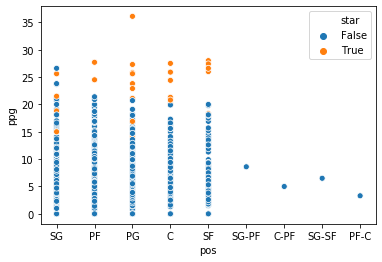

In [104]:
sns.scatterplot(df['pos'],df['ppg'],hue = df['star'])

In [30]:
#retrieve 2018 stats
request2 = requests.get('https://www.basketball-reference.com/leagues/NBA_2018_per_game.html')
soup = BeautifulSoup(request2.content, 'html.parser')
stats_container = soup.find_all('td')
names_container = soup.find_all(class_='left')
names_container[0].text
names = []
for i in range(len(names_container)):
    names.append(names_container[i].text)
names = names[::2]
names = names[:-1]

In [31]:
len(names)

664

In [32]:
request2 = requests.get('https://www.basketball-reference.com/leagues/NBA_2018_per_game.html')
soup2 = BeautifulSoup(request2.content, 'html.parser')
stats_container2 = soup2.find_all('td')


pos_container = stats_container[1::29]
pos = []
for i in range(len(pos_container)):
    pos.append(pos_container[i].text)
len(pos)

age_container = stats_container[2::29]
ages = []
for i in range(len(age_container)):
    ages.append(age_container[i].text)
len(ages)

team_container = stats_container[3::29]
teams = []
for i in range(len(team_container)):
    teams.append(team_container[i].text)
len(teams)
teams[0]

gs_container = stats_container[5::29]
gs = []
for i in range(len(gs_container)):
    gs.append(gs_container[i].text)
len(gs)

minutes_container = stats_container[6::29]
minutes = []
for i in range(len(minutes_container)):
    minutes.append(minutes_container[i].text)
len(minutes)

fg_percent_container = stats_container[9::29]
fg_percent = []
for i in range(len(fg_percent_container)):
    fg_percent.append(fg_percent_container[i].text)
len(fg_percent)

fg3_percent_container = stats_container[12::29]
fg3_percent = []
for i in range(len(fg3_percent_container)):
    fg3_percent.append(fg3_percent_container[i].text)
len(fg3_percent)

fg2_percent_container = stats_container[15::29]
fg2_percent = []
for i in range(len(fg2_percent_container)):
    fg2_percent.append(fg2_percent_container[i].text)
len(fg2_percent)

fta_container = stats_container[18::29]
fta = []
for i in range(len(fta_container)):
    fta.append(fta_container[i].text)
len(fta)

ft_percent_container = stats_container[19::29]
ft_pct = []
for i in range(len(ft_percent_container)):
    ft_pct.append(ft_percent_container[i].text)
len(ft_pct)

o_reb_container = stats_container[20::29]
o_reb = []
for i in range(len(o_reb_container)):
    o_reb.append(o_reb_container[i].text)
len(o_reb)

d_reb_container = stats_container[21::29]
d_reb = []
for i in range(len(d_reb_container)):
    d_reb.append(d_reb_container[i].text)
len(d_reb)
d_reb

ast_container = stats_container[23::29]
ast = []
for i in range(len(ast_container)):
    ast.append(ast_container[i].text)
len(ast)

stl_container = stats_container[24::29]
stl = []
for i in range(len(stl_container)):
    stl.append(stl_container[i].text)
len(stl)

blk_container = stats_container[25::29]
blk = []
for i in range(len(blk_container)):
    blk.append(blk_container[i].text)
len(blk)

tov_container = stats_container[26::29]
tov = []
for i in range(len(tov_container)):
    tov.append(tov_container[i].text)
len(tov)

pf_container = stats_container[27::29]
pf = []
for i in range(len(pf_container)):
    pf.append(pf_container[i].text)
len(pf)

ppg_container = stats_container[28::29]
ppg = []
for i in range(len(ppg_container)):
    ppg.append(ppg_container[i].text)
len(ppg)

df2 = pd.DataFrame({"name":names,"pos":pos,"age":ages,"team":teams,"gs":gs,"minutes":minutes,"fg2 pct":fg2_percent,
             "fg3 pct":fg3_percent,"fta":fta,"ft pct":ft_pct,"off reb":o_reb,"def reb":d_reb,
             "ast":ast,"stl":stl,"blk":blk,"tov":tov,"pf":pf,"ppg":ppg})
df2

,name,pos,age,team,gs,minutes,fg2 pct,fg3 pct,fta,ft pct,off reb,def reb,ast,stl,blk,tov,pf,ppg
0,Álex Abrines,SG,24,OKC,8,15.1,.443,.380,0.6,.848,0.3,1.2,0.4,0.5,0.1,0.3,1.7,4.7
1,Quincy Acy,PF,27,BRK,8,19.4,.384,.349,0.9,.817,0.6,3.1,0.8,0.5,0.4,0.9,2.1,5.9
2,Steven Adams,C,24,OKC,76,32.7,.631,.000,3.8,.559,5.1,4.0,1.2,1.2,1.0,1.7,2.8,13.9
3,Bam Adebayo,C,20,MIA,19,19.8,.523,.000,2.6,.721,1.7,3.8,1.5,0.5,0.6,1.0,2.0,6.9
4,Arron Afflalo,SG,32,ORL,3,12.9,.413,.386,0.5,.846,0.1,1.2,0.6,0.1,0.2,0.4,1.1,3.4
5,Cole Aldrich,C,29,MIN,0,2.3,.333,,0.3,.333,0.1,0.6,0.1,0.1,0.0,0.0,0.5,0.6
6,LaMarcus Aldridge,C,32,SAS,75,33.5,.526,.293,5.3,.837,3.3,5.2,2.0,0.6,1.2,1.5,2.1,23.1
7,Jarrett Allen,C,19,BRK,31,20.0,.599,.333,2.0,.776,2.0,3.4,0.7,0.4,1.2,1.1,2.0,8.2
8,Kadeem Allen,PG,25,BOS,1,5.9,.545,.000,0.5,.778,0.2,0.4,0.7,0.2,0.1,0.5,0.8,1.1
9,Tony Allen,SF,36,NOP,0,12.4,.506,.333,1.0,.524,0.9,1.2,0.4,0.5,0.1,0.9,2.2,4.7


In [33]:
#2018 all stars

all_stars18 = ["Kyrie Irving", "DeMar DeRozan","LeBron James","Joel Embiid","Giannis Antetokounmpo","Bradley Beal",
               "Goran Dragić","Al Horford","Kevin Love","Kyle Lowry","Victor Oladipo","Kristaps Porziņģis",
               "John Wall","Andre Drummond","Kemba Walker","Stephen Curry","James Harden","Kevin Durant",
               "DeMarcus Cousins","Anthony Davis","Russell Westbrook","Damian Lillard","Draymond Green","Karl-Anthony Towns",
               "LaMarcus Aldridge","Klay Thompson","Jimmy Butler","Paul George"]
len(all_stars18)

28

In [34]:
df2.loc[df2['name'].isin(all_stars18)]

,name,pos,age,team,gs,minutes,fg2 pct,fg3 pct,fta,ft pct,off reb,def reb,ast,stl,blk,tov,pf,ppg
6,LaMarcus Aldridge,C,32,SAS,75,33.5,.526,.293,5.3,.837,3.3,5.2,2.0,0.6,1.2,1.5,2.1,23.1
15,Giannis Antetokounmpo,PF,23,MIL,75,36.7,.554,.307,8.5,.760,2.1,8.0,4.8,1.5,1.4,3.0,3.1,26.9
40,Bradley Beal,SG,24,WAS,82,36.3,.507,.375,4.5,.791,0.7,3.7,4.5,1.2,0.4,2.6,2.0,22.6
93,Jimmy Butler,SG,28,MIN,59,36.7,.509,.350,7.2,.854,1.3,4.0,4.9,2.0,0.4,1.8,1.3,22.2
134,DeMarcus Cousins,C,27,NOP,48,36.2,.530,.354,8.2,.746,2.2,10.7,5.4,1.6,1.6,5.0,3.8,25.2
146,Stephen Curry,PG,29,GSW,51,32.0,.595,.423,5.9,.921,0.7,4.4,6.1,1.6,0.2,3.0,2.2,26.4
148,Anthony Davis,PF,24,NOP,75,36.4,.558,.340,8.0,.828,2.5,8.6,2.3,1.5,2.6,2.2,2.1,28.1
156,DeMar DeRozan,SG,28,TOR,80,33.9,.494,.310,7.0,.825,0.7,3.2,5.2,1.1,0.3,2.2,1.9,23.0
164,Goran Dragić,PG,31,MIA,75,31.7,.481,.370,3.6,.801,0.7,3.4,4.8,0.8,0.2,2.2,2.4,17.3
168,Andre Drummond,C,24,DET,78,33.7,.536,.000,5.1,.605,5.1,10.9,3.0,1.5,1.6,2.6,3.2,15.0


In [35]:
df2['star'] = df2['name'].isin(all_stars18)
df2

,name,pos,age,team,gs,minutes,fg2 pct,fg3 pct,fta,ft pct,off reb,def reb,ast,stl,blk,tov,pf,ppg,star
0,Álex Abrines,SG,24,OKC,8,15.1,.443,.380,0.6,.848,0.3,1.2,0.4,0.5,0.1,0.3,1.7,4.7,False
1,Quincy Acy,PF,27,BRK,8,19.4,.384,.349,0.9,.817,0.6,3.1,0.8,0.5,0.4,0.9,2.1,5.9,False
2,Steven Adams,C,24,OKC,76,32.7,.631,.000,3.8,.559,5.1,4.0,1.2,1.2,1.0,1.7,2.8,13.9,False
3,Bam Adebayo,C,20,MIA,19,19.8,.523,.000,2.6,.721,1.7,3.8,1.5,0.5,0.6,1.0,2.0,6.9,False
4,Arron Afflalo,SG,32,ORL,3,12.9,.413,.386,0.5,.846,0.1,1.2,0.6,0.1,0.2,0.4,1.1,3.4,False
5,Cole Aldrich,C,29,MIN,0,2.3,.333,,0.3,.333,0.1,0.6,0.1,0.1,0.0,0.0,0.5,0.6,False
6,LaMarcus Aldridge,C,32,SAS,75,33.5,.526,.293,5.3,.837,3.3,5.2,2.0,0.6,1.2,1.5,2.1,23.1,True
7,Jarrett Allen,C,19,BRK,31,20.0,.599,.333,2.0,.776,2.0,3.4,0.7,0.4,1.2,1.1,2.0,8.2,False
8,Kadeem Allen,PG,25,BOS,1,5.9,.545,.000,0.5,.778,0.2,0.4,0.7,0.2,0.1,0.5,0.8,1.1,False
9,Tony Allen,SF,36,NOP,0,12.4,.506,.333,1.0,.524,0.9,1.2,0.4,0.5,0.1,0.9,2.2,4.7,False


In [36]:
df2['ppg'] = pd.to_numeric(df2["ppg"])
df2['age'] = pd.to_numeric(df2["age"])
df2['gs'] = pd.to_numeric(df2["gs"])
df2['minutes'] = pd.to_numeric(df2["minutes"])
df2['fg2 pct'] = pd.to_numeric(df2["fg2 pct"])
df2['fg3 pct'] = pd.to_numeric(df2["fg3 pct"])
df2['fta'] = pd.to_numeric(df2["fta"])
df2['ft pct'] = pd.to_numeric(df2["ft pct"])
df2['off reb'] = pd.to_numeric(df2["off reb"])
df2['def reb'] = pd.to_numeric(df2["def reb"])
df2['ast'] = pd.to_numeric(df2["ast"])
df2['stl'] = pd.to_numeric(df2["stl"])
df2['blk'] = pd.to_numeric(df2["blk"])
df2['tov'] = pd.to_numeric(df2["tov"])
df2['pf'] = pd.to_numeric(df2["pf"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 19 columns):
name       664 non-null object
pos        664 non-null object
age        664 non-null int64
team       664 non-null object
gs         664 non-null int64
minutes    664 non-null float64
fg2 pct    646 non-null float64
fg3 pct    599 non-null float64
fta        664 non-null float64
ft pct     606 non-null float64
off reb    664 non-null float64
def reb    664 non-null float64
ast        664 non-null float64
stl        664 non-null float64
blk        664 non-null float64
tov        664 non-null float64
pf         664 non-null float64
ppg        664 non-null float64
star       664 non-null bool
dtypes: bool(1), float64(13), int64(2), object(3)
memory usage: 94.1+ KB


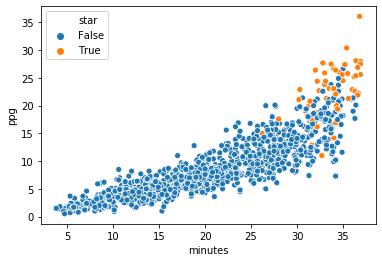

In [384]:
sns.scatterplot(df_all['minutes'],df_all['ppg'],hue = df_all['star'])

In [181]:
#replace na with 0
df2 = df2.fillna(0)
df = df.fillna(0)

In [182]:
#decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pandas as pd 
import numpy as np 

from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
df2['star'].unique()

array([False,  True])

In [183]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661 entries, 0 to 663
Data columns (total 19 columns):
name       661 non-null object
pos        661 non-null object
age        661 non-null int64
team       661 non-null object
gs         661 non-null int64
minutes    661 non-null float64
fg2 pct    661 non-null float64
fg3 pct    661 non-null float64
fta        661 non-null float64
ft pct     661 non-null float64
off reb    661 non-null float64
def reb    661 non-null float64
ast        661 non-null float64
stl        661 non-null float64
blk        661 non-null float64
tov        661 non-null float64
pf         661 non-null float64
ppg        661 non-null float64
star       661 non-null bool
dtypes: bool(1), float64(13), int64(2), object(3)
memory usage: 98.8+ KB


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression()
logreg.fit(X18, y18)
y18_pred = logreg.predict(X18)
y18_pred
confusion_matrix = confusion_matrix(y18, y18_pred)
print(confusion_matrix)


In [ ]:
df2_full

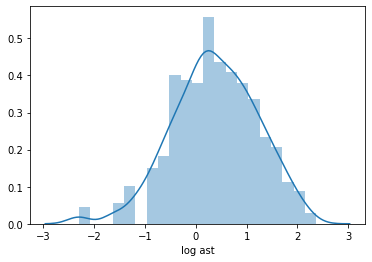

In [372]:
sns.distplot(df_all['log ast'])

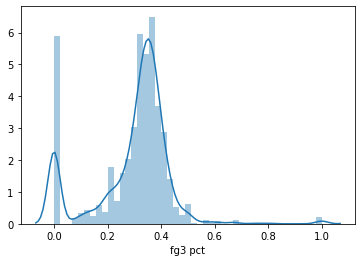

In [307]:
sns.distplot((df_all['fg3 pct']))

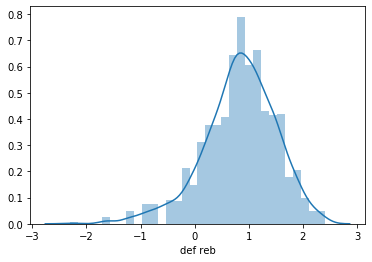

In [303]:
sns.distplot(np.log(df_all['def reb']))


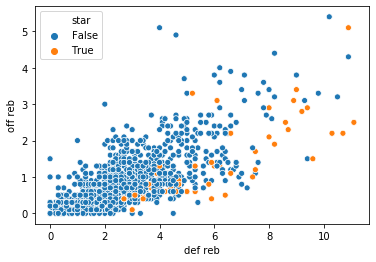

In [240]:
sns.scatterplot(df_all['def reb'],df_all['off reb'],hue=df_all['star'])

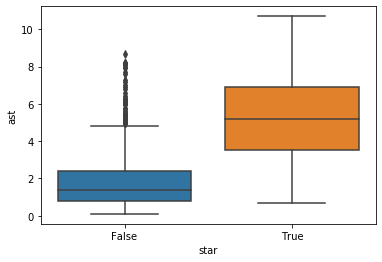

In [416]:
sns.boxplot(df_all['star'],df_all['ast'])

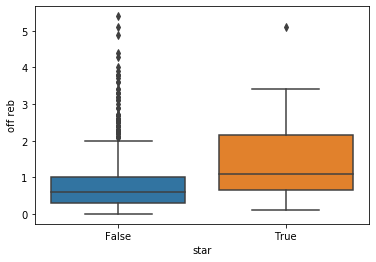

In [256]:
sns.boxplot(df_all['star'],df_all['off reb'])

,age,gs,minutes,fg2 pct,fg3 pct,fta,ft pct,off reb,def reb,ast,...,pf,ppg,star,C,PF,SF,SG,log ppg,log off reb,log def reb
age,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
gs,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
minutes,False,True,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
fg2 pct,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fg3 pct,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fta,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
ft pct,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
off reb,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
def reb,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
ast,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


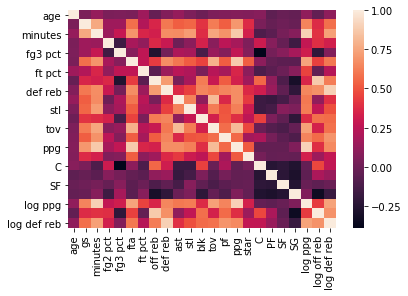

In [334]:
corr = df_all.corr()
sns.heatmap(corr)
abs(df_all.corr())>.75

In [359]:
features = list(df_all.columns)
features.remove('name')
features.remove('star')
features.remove('team')
features

# drop tov, gs, 
features.remove('tov')
features.remove('gs')

# remove features that have been transformed
features.remove('ppg')
features.remove('off reb')
features.remove('def reb')
features.remove('ast')
features.remove('stl')
features.remove('blk')
features

['age',
 'minutes',
 'fg2 pct',
 'fg3 pct',
 'fta',
 'ft pct',
 'pf',
 'C',
 'PF',
 'SF',
 'SG',
 'log ppg',
 'log off reb',
 'log def reb',
 'log ast',
 'log blk',
 'log stl']

In [385]:
#smote logistic regression
variables = features
X18 = df_all.loc[:, variables]
y18 = df_all.loc[:,'star']
X18_train, X18_test, y18_train, y18_test = train_test_split(X18, y18, test_size = 0.3, random_state = 9)
#print(len(X18_test))
#print(len(predictions_smote))
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X18_train, y18_train.ravel()) 
  
predictions = lr.predict(X18_test) 
  
# print classification report
from sklearn.metrics import confusion_matrix, classification_report 
print(pd.crosstab(y18_test, predictions_smote, rownames=['Actual'], colnames=['Predicted'], margins=True))
print('\n')
print(pd.crosstab(y18_test, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True))

#use smote
sm = SMOTE(random_state = 2) 
X18_train_res, y18_train_res = sm.fit_sample(X18_train, y18_train.ravel()) 

lr1 = LogisticRegression() 
lr1.fit(X18_train_res, y18_train_res.ravel()) 
predictions_smote = lr1.predict(X18_test) 
  
# print classification report 
print(classification_report(y18_test, predictions_smote)) 
print('\n')
print(classification_report(y18_test, predictions))
coef_dict = {}
for coef, feat in zip(lr1.coef_[0,:],variables):
    coef_dict[feat] = coef
coef_dict


Predicted  False  True  All
Actual                     
False        299    23  322
True           1    11   12
All          300    34  334


Predicted  False  True  All
Actual                     
False        319     3  322
True           7     5   12
All          326     8  334
              precision    recall  f1-score   support

       False       1.00      0.93      0.96       322
        True       0.32      0.92      0.48        12

    accuracy                           0.93       334
   macro avg       0.66      0.92      0.72       334
weighted avg       0.97      0.93      0.94       334



              precision    recall  f1-score   support

       False       0.98      0.99      0.98       322
        True       0.62      0.42      0.50        12

    accuracy                           0.97       334
   macro avg       0.80      0.70      0.74       334
weighted avg       0.97      0.97      0.97       334



/Users/KevinSun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/KevinSun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'age': 0.031121813582799595,
 'minutes': -0.0203519385852301,
 'fg2 pct': -3.095022246693481,
 'fg3 pct': 1.194381757249347,
 'fta': 0.7728359815548551,
 'ft pct': -1.5107704468322243,
 'pf': -1.5345492219154553,
 'C': -0.04338714227251245,
 'PF': -0.63297713155375,
 'SF': -1.246212274053313,
 'SG': -0.9518637820935846,
 'log ppg': 1.4927592116175754,
 'log off reb': -1.2360186331070766,
 'log def reb': 2.6725509011830386,
 'log ast': 1.6225895085420847,
 'log blk': 0.9883207349940536,
 'log stl': -0.14022650709207077}



Predicted  False  True  All
Actual                     
False        307    15  322
True           1    11   12
All          308    26  334


              precision    recall  f1-score   support

       False       1.00      0.95      0.97       322
        True       0.42      0.92      0.58        12

    accuracy                           0.95       334
   macro avg       0.71      0.94      0.78       334
weighted avg       0.98      0.95      0.96       334





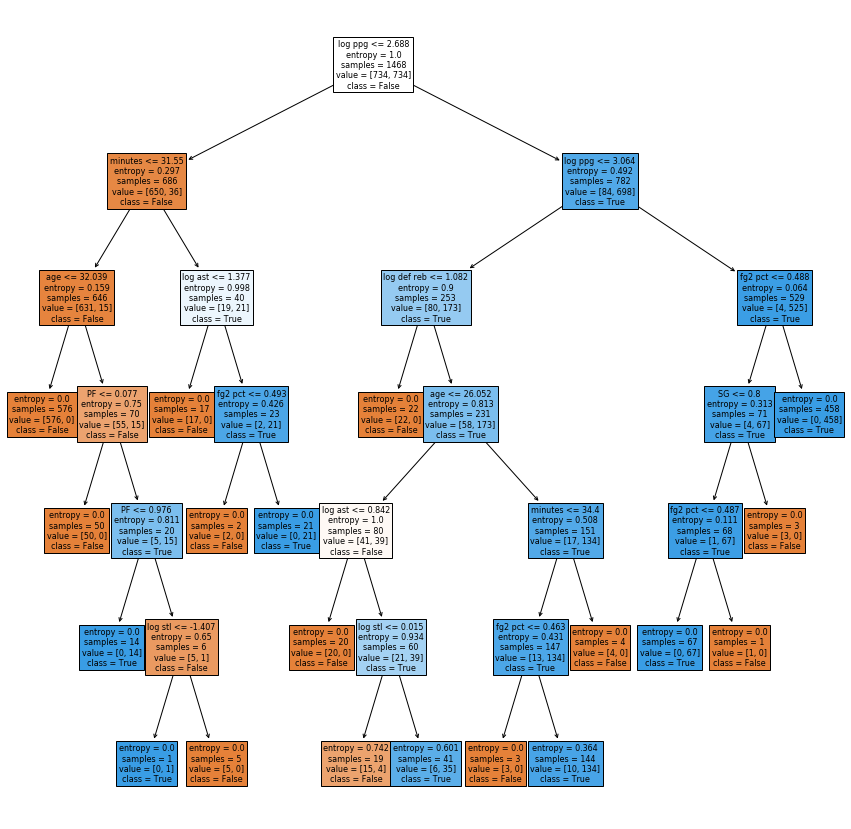

In [415]:
#smote decision tree

#no smote
clf = DecisionTreeClassifier(criterion='entropy',max_depth = 6)
clf.fit(X18_train,y18_train)
y18_pred_train = clf.predict(X18_train)
y18_pred_test = clf.predict(X18_test)


#print(pd.crosstab(y18_train, y18_pred_train, rownames=['Actual'], colnames=['Predicted'], margins=True))
print('\n')
#print(pd.crosstab(y18_test, y18_pred_test, rownames=['Actual'], colnames=['Predicted'], margins=True))

#using smote
clf1 = DecisionTreeClassifier(criterion='entropy',max_depth = 6)
clf1.fit(X18_train_res, y18_train_res.ravel())
y18_pred_test_smote = clf1.predict(X18_test)
print(pd.crosstab(y18_test, y18_pred_test_smote, rownames=['Actual'], colnames=['Predicted'], margins=True))
print('\n')
#print(pd.crosstab(y18_test, y18_pred_test, rownames=['Actual'], colnames=['Predicted'], margins=True))

print(classification_report(y18_test, y18_pred_test_smote)) 
print('\n')
#print(classification_report(y18_test, y18_pred_test))
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot()
fig2 = tree.plot_tree(clf1,class_names = ['False','True'], feature_names = variables, filled = True, ax = ax1, fontsize = 8);
fig2;

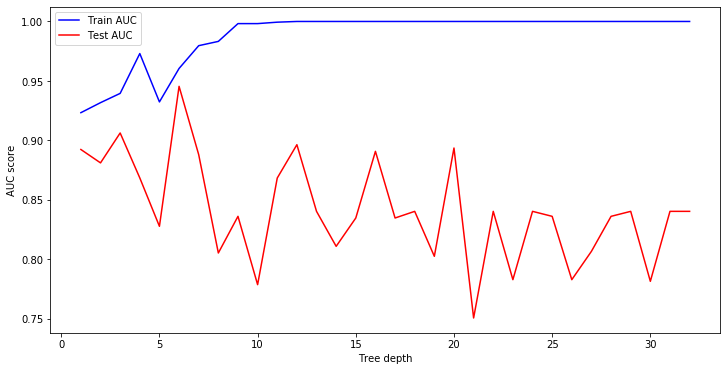

In [339]:
#find best k for decision tree
from sklearn.metrics import roc_curve, auc
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    dt.fit(X18_train_res, y18_train_res)
    train_pred = dt.predict(X18_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y18_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
    train_results.append(roc_auc)
    y18_pred = dt.predict(X18_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y18_test, y18_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
    test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

In [ ]:
metrics.accuracy_score(y18_test, y18_pred_test_smote)

In [ ]:
X18_train_res.shape

In [409]:
# Support vector machines
from sklearn.svm import SVC  
# no smote
svclassifier = SVC(kernel='linear', C=0.1)  
svclassifier.fit(X18_train, y18_train) 
y_pred = svclassifier.predict(X18_test)

#smote
svclassifier1 = SVC(kernel='linear', C=0.1)  
svclassifier1.fit(X18_train_res, y18_train_res.ravel()) 
y_pred_smote = svclassifier1.predict(X18_test)

print(pd.crosstab(y18_test, y_pred_smote, rownames=['Actual'], colnames=['Predicted'], margins=True))
print('\n')
print(pd.crosstab(y18_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))



print(classification_report(y18_test, y_pred_smote)) 
print('\n')
print(classification_report(y18_test, y_pred))

Predicted  False  True  All
Actual                     
False        296    26  322
True           0    12   12
All          296    38  334


Predicted  False  True  All
Actual                     
False        318     4  322
True           8     4   12
All          326     8  334
              precision    recall  f1-score   support

       False       1.00      0.92      0.96       322
        True       0.32      1.00      0.48        12

    accuracy                           0.92       334
   macro avg       0.66      0.96      0.72       334
weighted avg       0.98      0.92      0.94       334



              precision    recall  f1-score   support

       False       0.98      0.99      0.98       322
        True       0.50      0.33      0.40        12

    accuracy                           0.96       334
   macro avg       0.74      0.66      0.69       334
weighted avg       0.96      0.96      0.96       334



In [293]:
# unadjusted features
features1 = list(df_all.columns)
features1.remove('log ppg')
features1.remove('log off reb')
features1.remove('log def reb')
features1.remove('team')
features1.remove('name')
features1.remove('star')
features1.remove('gs')
features1.remove('tov')
features1

['age',
 'minutes',
 'fg2 pct',
 'fg3 pct',
 'fta',
 'ft pct',
 'off reb',
 'def reb',
 'ast',
 'stl',
 'blk',
 'pf',
 'ppg',
 'C',
 'PF',
 'SF',
 'SG']

In [323]:
#logistic regression
variables1 = features1
X = df_all.loc[:, variables1]
y = df_all.loc[:,'star']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 9)
lr_init = LogisticRegression() 
  
# train the model on train set 
lr_init.fit(X_train, y_train.ravel()) 
  
predictions_init = lr_init.predict(X_test) 
  
# print classification report
from sklearn.metrics import confusion_matrix, classification_report 
print(pd.crosstab(y_test, predictions_smote_init, rownames=['Actual'], colnames=['Predicted'], margins=True))
print('\n')
print(pd.crosstab(y_test, predictions_init, rownames=['Actual'], colnames=['Predicted'], margins=True))

#use smote
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

lr1_init = LogisticRegression() 
lr1_init.fit(X_train_res, y_train_res.ravel()) 
predictions_smote_init = lr1_init.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions_smote_init)) 
print('\n')
print(classification_report(y_test, predictions_init))
coef_dict_init = {}
for coef, feat in zip(lr1_init.coef_[0,:],variables1):
    coef_dict_init[feat] = coef
coef_dict_init


Predicted  False  True  All
Actual                     
False        325    33  358
True           0    17   17
All          325    50  375


Predicted  False  True  All
Actual                     
False        351     7  358
True           6    11   17
All          357    18  375
              precision    recall  f1-score   support

       False       1.00      0.91      0.95       358
        True       0.34      1.00      0.51        17

    accuracy                           0.91       375
   macro avg       0.67      0.95      0.73       375
weighted avg       0.97      0.91      0.93       375



              precision    recall  f1-score   support

       False       0.98      0.98      0.98       358
        True       0.61      0.65      0.63        17

    accuracy                           0.97       375
   macro avg       0.80      0.81      0.81       375
weighted avg       0.97      0.97      0.97       375



/Users/KevinSun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/KevinSun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'age': 0.12577568876733897,
 'minutes': -0.26543945621810044,
 'fg2 pct': -2.9748581502653835,
 'fg3 pct': -1.4838411404401493,
 'fta': -0.49815985559671483,
 'ft pct': -1.983768239428121,
 'off reb': -0.5149519775015738,
 'def reb': 0.9338744592953031,
 'ast': 0.9680024855829048,
 'stl': -0.1292431640376879,
 'blk': 0.6157169148211891,
 'pf': -1.5190789702148728,
 'ppg': 0.7116939514794345,
 'C': -0.016310195600928862,
 'PF': -0.3820059583492875,
 'SF': 0.02179232032859528,
 'SG': -0.9445917372195232}

In [321]:
logit_model=stats.Logit(y_train,X_train)
result=logit_model.fit()
#print(result.summary())

logit_model_smote = stats.Logit(y_train_res, X_train_res)
result_smote = logit_model_smote.fit()


Optimization terminated successfully.
         Current function value: 0.057389
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.105447
         Iterations 11
[[24.         10.6         0.565      ...  1.          0.
   0.        ]
 [22.         20.          0.488      ...  0.          1.
   0.        ]
 [21.         14.7         0.574      ...  1.          0.
   0.        ]
 ...
 [27.94308733 33.68699323  0.51539027 ...  0.          0.
   0.76422817]
 [24.         33.51868266  0.55635515 ...  0.20146371  0.
   0.        ]
 [23.39224722 30.82953375  0.53092247 ...  0.          0.
   0.        ]]
